In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression

from sklearn.datasets import fetch_california_housing

## Some model

In [25]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.609803397808786

In [26]:
y_pred = lr.predict(X_test)

In [27]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2255,3.1250,16.0,5.380071,1.058201,3407.0,3.004409,36.80,-119.83
17341,2.0508,11.0,4.993884,1.064220,504.0,1.541284,34.86,-120.40
11589,5.1061,26.0,6.714765,1.013423,836.0,2.805369,33.78,-118.03
13635,2.3750,38.0,4.307065,0.937500,1347.0,3.660326,34.09,-117.32
693,2.1552,23.0,3.812641,1.040632,828.0,1.869074,37.70,-122.11


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(0.5349313287784497, 0.536251980727769, 0.609803397808786)

In [7]:
cols = X_train.columns.to_list()

In [8]:
coeffs = lr.coef_

## Residuals 

In [9]:
from MLLytics.regression import plot_resid

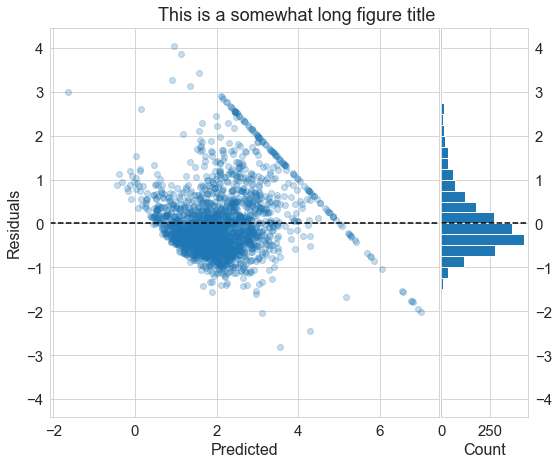

In [10]:
plot_resid(y_test, y_pred)

## Coefficiants 

In [29]:
from MLLytics.regression import plot_coeffs

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb683e028d0>)

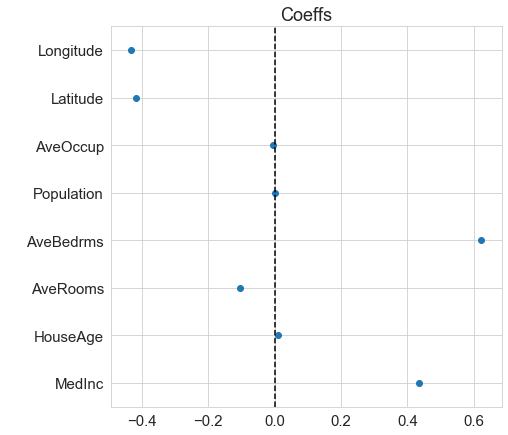

In [30]:
plot_coeffs(coeffs,cols)

In [31]:
from MLLytics.regression import gen_coeff_box_stats, plot_box

In [32]:
X_coeffs, stats = gen_coeff_box_stats(X_train, X_train.columns, lr.coef_)

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb683f3f710>)

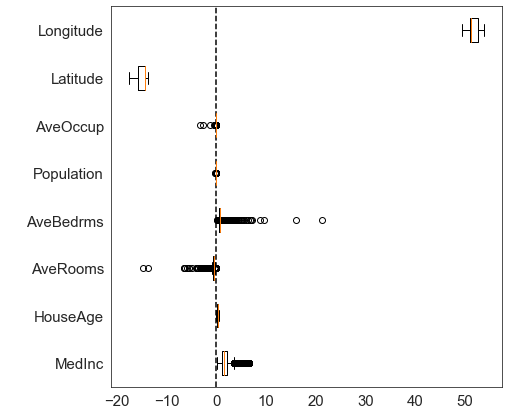

In [33]:
plot_box(stats)

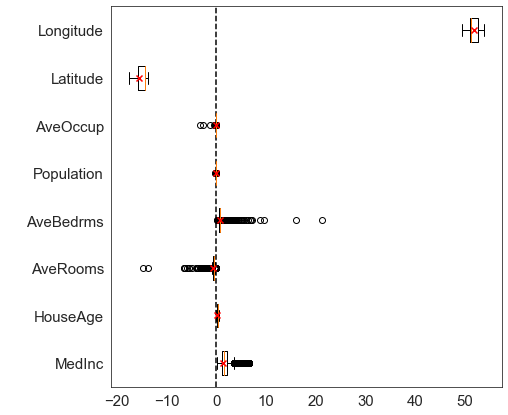

In [34]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
ax = plot_box(stats, axs=ax)

X = X_coeffs.iloc[0].values
ax.scatter(X[0], 1, color='red', marker='x', zorder=100)
ax.scatter(X[1], 2, color='red', marker='x', zorder=100)
ax.scatter(X[2], 3, color='red', marker='x', zorder=100)
ax.scatter(X[3], 4, color='red', marker='x', zorder=100)
ax.scatter(X[4], 5, color='red', marker='x', zorder=100)
ax.scatter(X[5], 6, color='red', marker='x', zorder=100)
ax.scatter(X[6], 7, color='red', marker='x', zorder=100)
ax.scatter(X[7], 8, color='red', marker='x', zorder=100)

In [22]:
# # Fixing random state for reproducibility
# np.random.seed(19680801)

# # some random data
# #x = np.random.randn(1000)
# #y = np.random.randn(1000)

# x = X_train['Longitude']
# y = X_train['Latitude']

# def scatter_hist(x, y, ax, ax_histx, ax_histy):
#     # no labels
#     ax_histx.tick_params(axis="x", labelbottom=False)
#     ax_histy.tick_params(axis="y", labelleft=False)

#     # the scatter plot:
#     ax.scatter(x, y)

#     # now determine nice limits by hand:
#     binwidth = 0.25
    
#     xmin = np.min(x)
#     xmax = np.max(x)
#     bins_x = np.arange(int(xmin - binwidth), int(xmax + binwidth), binwidth)
    
#     ymin = np.min(y)
#     ymax = np.max(y)
#     bins_y = np.arange(int(ymin - binwidth), int(ymax + binwidth), binwidth)
        
    
    
#     #xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
#     #lim = (int(xymax/binwidth) + 1) * binwidth

#     #bins = np.arange(xmin, lim + binwidth, binwidth)
#     ax_histx.hist(x, bins=bins_x)
#     ax_histy.hist(y, bins=bins_y, orientation='horizontal')
    
# # definitions for the axes
# left, width = 0.1, 0.65
# bottom, height = 0.1, 0.65
# spacing = 0.005


# rect_scatter = [left, bottom, width, height]
# rect_histx = [left, bottom + height + spacing, width, 0.2]
# rect_histy = [left + width + spacing, bottom, 0.2, height]

# # start with a square Figure
# fig = plt.figure(figsize=(8, 8))

# ax = fig.add_axes(rect_scatter)
# ax_histx = fig.add_axes(rect_histx, sharex=ax)
# ax_histy = fig.add_axes(rect_histy, sharey=ax)

# # use the previously defined function
# scatter_hist(x, y, ax, ax_histx, ax_histy)

# plt.show()